In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
from datetime import timedelta
import pickle
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pingouin as pg


import warnings
warnings.filterwarnings(action='ignore') 

# 사이킷런
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 회귀
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
pd.set_option('display.max_row', 5000)
pd.set_option('display.max_columns', 100)

from matplotlib import font_manager, rc
import matplotlib
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
dir='C:\\농업기술원\\1차\\2019\\19-20_방울토마토(4)\\'

bun_harvest_data1 = pd.read_excel(dir+'19-20_방울토마토_번영농장_권현자(재배기간_2019.07.23~2020.06.10)/19-20작기_방울토마토_번영농장_권현자_생육1.xlsx',sheet_name='수확과')
bun_harvest_data2 = pd.read_excel(dir+'19-20_방울토마토_번영농장_권현자(재배기간_2019.07.23~2020.06.10)/19-20작기_방울토마토_번영농장_권현자_생육2.xlsx',sheet_name='수확과')

ari_harvest_data1 = pd.read_excel(dir+'19-20_방울토마토_아리울_박문신(재배기간_2019.07.23~2020.06.30)/19-20작기_방울토마토_아리울_박문신_생육1.xlsx',sheet_name='수확과')
ari_harvest_data2 = pd.read_excel(dir+'19-20_방울토마토_아리울_박문신(재배기간_2019.07.23~2020.06.30)/19-20작기_방울토마토_아리울_박문신_생육2.xlsx',sheet_name='수확과')

ha_harvest_data1 = pd.read_excel(dir+'19-20_방울토마토_하늘농장_유철민(재배기간_2019.07.23~2020.06.28)/19-20작기_방울토마토_하늘농장_유철민_생육1.xlsx',sheet_name='수확과')
ha_harvest_data2 = pd.read_excel(dir+'19-20_방울토마토_하늘농장_유철민(재배기간_2019.07.23~2020.06.28)/19-20작기_방울토마토_하늘농장_유철민_생육2.xlsx',sheet_name='수확과')

hwa_harvest_data1 = pd.read_excel(dir+'19-20_방울토마토_화천농장_박성호(재배기간_2019.07.25~2020.06.30)/19-20작기_방울토마토_화천농장_박성호_생육1.xlsx',sheet_name='수확과')
hwa_harvest_data2 = pd.read_excel(dir+'19-20_방울토마토_화천농장_박성호(재배기간_2019.07.25~2020.06.30)/19-20작기_방울토마토_화천농장_박성호_생육2.xlsx',sheet_name='수확과')

In [4]:
s1 = pd.concat([bun_harvest_data1,ari_harvest_data1,ha_harvest_data1,hwa_harvest_data1])

# 이상치 제거

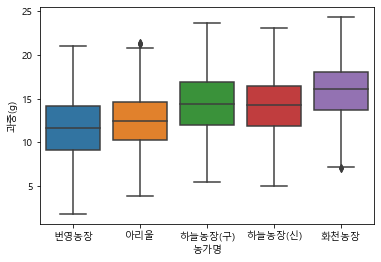

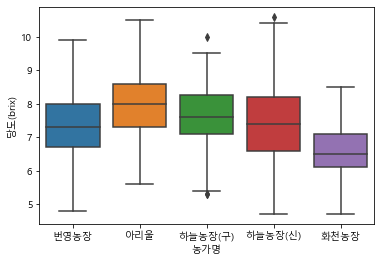

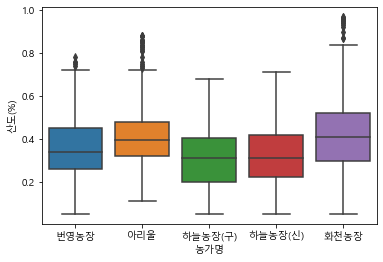

In [63]:
dataset_what=[]

what = ['과중(g)','당도(brix)', '산도(%)']
for col in what:
    df= s1[['농가명',col]]
    
    result_df=pd.DataFrame()
    for nong in s1['농가명'].unique():
        cut_df = df[df['농가명']==nong]
        
        q1 = cut_df[col].quantile(0.25)
        q3 = cut_df[col].quantile(0.75)
        
        iqt = 1.5 * (q3 - q1)

        # 이상치 제거
        if iqt!=0:
            cut_df=pd.DataFrame(cut_df[(cut_df[col] < (q3 + iqt)) & (cut_df[col] > (q1 - iqt))])
        
        result_df=pd.concat([result_df,cut_df])
    dataset_what.append(result_df)   
    sns.boxplot(data=result_df,x='농가명',y=col)
    plt.show()

In [6]:
s1[['농가명','과중(g)']]

,농가명,과중(g)
0,번영농장,5.39
1,번영농장,14.53
2,번영농장,4.95
3,번영농장,16.06
4,번영농장,14.71
...,...,...
1395,화천농장,15.62
1396,화천농장,17.19
1397,화천농장,14.68
1398,화천농장,14.60


In [11]:
s1

,농가명,날짜,주차,샘플,화방,수확번호,과중(g),과폭(mm),과고(mm),당도(brix),산도(%),Unnamed: 11
0,번영농장,2019-09-18,38,1,1,1,5.39,18.66,26.15,6.2,0.69,NaN
1,번영농장,2019-09-18,38,1,1,2,14.53,25.42,38.99,6.7,0.94,NaN
2,번영농장,2019-09-18,38,1,1,3,4.95,17.93,26.29,5.4,0.58,NaN
3,번영농장,2019-09-18,38,1,1,4,16.06,26.78,38.13,6.9,0.94,NaN
4,번영농장,2019-09-18,38,2,1,1,14.71,24.47,39.26,8.7,0.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,화천농장,2020-01-20,4,6,14,10,15.62,35.49,28.43,4.7,1.28,NaN
1396,화천농장,2020-01-20,4,6,14,11,17.19,NaN,NaN,NaN,NaN,NaN
1397,화천농장,2020-01-20,4,6,14,12,14.68,NaN,NaN,NaN,NaN,NaN
1398,화천농장,2020-01-20,4,6,14,13,14.60,NaN,NaN,NaN,NaN,NaN


In [19]:
nong_list=s1['농가명'].unique()

In [68]:
def select_col(num,col):
    result = []
    d=dataset_what[num]
    for i in nong_list:
        df = d[['농가명',col]]
        df = df.dropna()
        df = df[df['농가명']==i]

        result.append(df)
    return result

# 1기작간에 농가별 수확과 비교

## 과중

In [73]:
num=0
col='과중(g)'

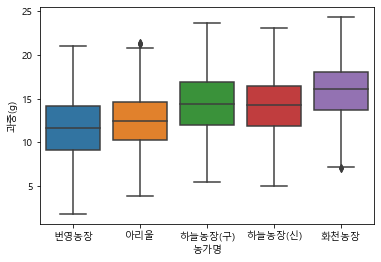

In [74]:
sns.boxplot(data = dataset_what[num], x = '농가명',y=col)

In [85]:
result=select_col(num,col)

In [76]:
# 등분산성검정
stats.levene(result[0][col],result[1][col],result[2][col],result[3][col],result[4][col])

LeveneResult(statistic=4.74034500225546, pvalue=0.0008109578822141311)

In [77]:
pg.welch_anova(dv = col,
              between = '농가명',
              data = pd.concat(result))

,Source,ddof1,ddof2,F,p-unc,np2
0,농가명,4,2500.955359,288.47522,3.658638e-204,0.186098


In [78]:
# 사후검정
hsd = pairwise_tukeyhsd(pd.concat(result)[col], pd.concat(result)['농가명'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
번영농장,아리울,1.0122,0.001,0.6055,1.4189,True
번영농장,하늘농장(구),3.0212,0.001,2.5992,3.4431,True
번영농장,하늘농장(신),2.7742,0.001,2.3573,3.1912,True
번영농장,화천농장,4.3331,0.001,3.9594,4.7068,True
아리울,하늘농장(구),2.009,0.001,1.5727,2.4452,True
아리울,하늘농장(신),1.762,0.001,1.3306,2.1935,True
아리울,화천농장,3.3209,0.001,2.9311,3.7107,True
하늘농장(구),하늘농장(신),-0.2469,0.5477,-0.6928,0.1989,False
하늘농장(구),화천농장,1.3119,0.001,0.9062,1.7176,True
하늘농장(신),화천농장,1.5588,0.001,1.1584,1.9593,True


LeveneResult(statistic=1.9653206867893345, pvalue=0.09696167162759113)

## 당도

In [86]:
num=1
col='당도(brix)'

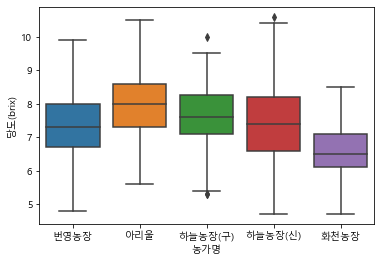

In [87]:
sns.boxplot(data = dataset_what[num], x = '농가명',y=col)

In [88]:
result=select_col(num,col)

In [89]:
# 등분산성검정
stats.levene(result[0][col],result[1][col],result[2][col],result[3][col],result[4][col])

LeveneResult(statistic=11.857888995134699, pvalue=1.7260482307502985e-09)

In [90]:
pg.welch_anova(dv = col,
              between = '농가명',
              data = pd.concat(result))

,Source,ddof1,ddof2,F,p-unc,np2
0,농가명,4,699.967686,131.716994,7.688488e-84,0.230329


In [91]:
# 사후검정
hsd = pairwise_tukeyhsd(pd.concat(result)[col], pd.concat(result)['농가명'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
번영농장,아리울,0.6522,0.001,0.4479,0.8564,True
번영농장,하늘농장(구),0.3195,0.001,0.0975,0.5415,True
번영농장,하늘농장(신),0.1438,0.3884,-0.0772,0.3648,False
번영농장,화천농장,-0.7681,0.001,-0.96,-0.5763,True
아리울,하늘농장(구),-0.3327,0.001,-0.5551,-0.1102,True
아리울,하늘농장(신),-0.5084,0.001,-0.7298,-0.287,True
아리울,화천농장,-1.4203,0.001,-1.6127,-1.228,True
하늘농장(구),하늘농장(신),-0.1757,0.2581,-0.4136,0.0622,False
하늘농장(구),화천농장,-1.0876,0.001,-1.2988,-0.8765,True
하늘농장(신),화천농장,-0.9119,0.001,-1.1219,-0.7019,True


## 산도

In [99]:
num=2
col='산도(%)'

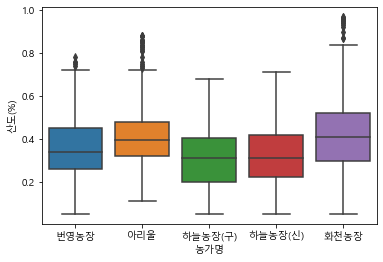

In [100]:
sns.boxplot(data = dataset_what[num], x = '농가명',y=col)

In [101]:
result=select_col(num,col)

In [102]:
# 등분산성검정
stats.levene(result[0][col],result[1][col],result[2][col],result[3][col],result[4][col])

LeveneResult(statistic=5.5910493509787065, pvalue=0.00018225088145022486)

In [103]:
pg.welch_anova(dv = col,
              between = '농가명',
              data = pd.concat(result))

,Source,ddof1,ddof2,F,p-unc,np2
0,농가명,4,692.042871,31.296191,5.574493e-24,0.080425


In [104]:
# 사후검정
hsd = pairwise_tukeyhsd(pd.concat(result)[col], pd.concat(result)['농가명'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
번영농장,아리울,0.0688,0.001,0.0333,0.1044,True
번영농장,하늘농장(구),-0.0432,0.0151,-0.0808,-0.0056,True
번영농장,하늘농장(신),-0.029,0.2139,-0.0665,0.0084,False
번영농장,화천농장,0.0682,0.001,0.0351,0.1013,True
아리울,하늘농장(구),-0.112,0.001,-0.1504,-0.0736,True
아리울,하늘농장(신),-0.0979,0.001,-0.1362,-0.0596,True
아리울,화천농장,-0.0006,0.9,-0.0347,0.0334,False
하늘농장(구),하늘농장(신),0.0141,0.8606,-0.0261,0.0544,False
하늘농장(구),화천농장,0.1114,0.001,0.0752,0.1476,True
하늘농장(신),화천농장,0.0972,0.001,0.0612,0.1333,True
